### Importing Libraries

In [21]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import plotly.graph_objs as go
import plotly.offline as py

### Reading and displaying data

In [22]:
df = pd.read_csv("E:\\sem3\\projectsem3\\dataset.csv")
df

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,glucose,TenYearCHD
0,1,39,4.0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,77.0,0
1,0,46,2.0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,76.0,0
2,1,48,1.0,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,70.0,0
3,0,61,3.0,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,103.0,1
4,0,46,3.0,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,86.0,1
4234,1,51,3.0,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,68.0,0
4235,0,48,2.0,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,86.0,0
4236,0,44,1.0,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,NaN,0


### Correlation value

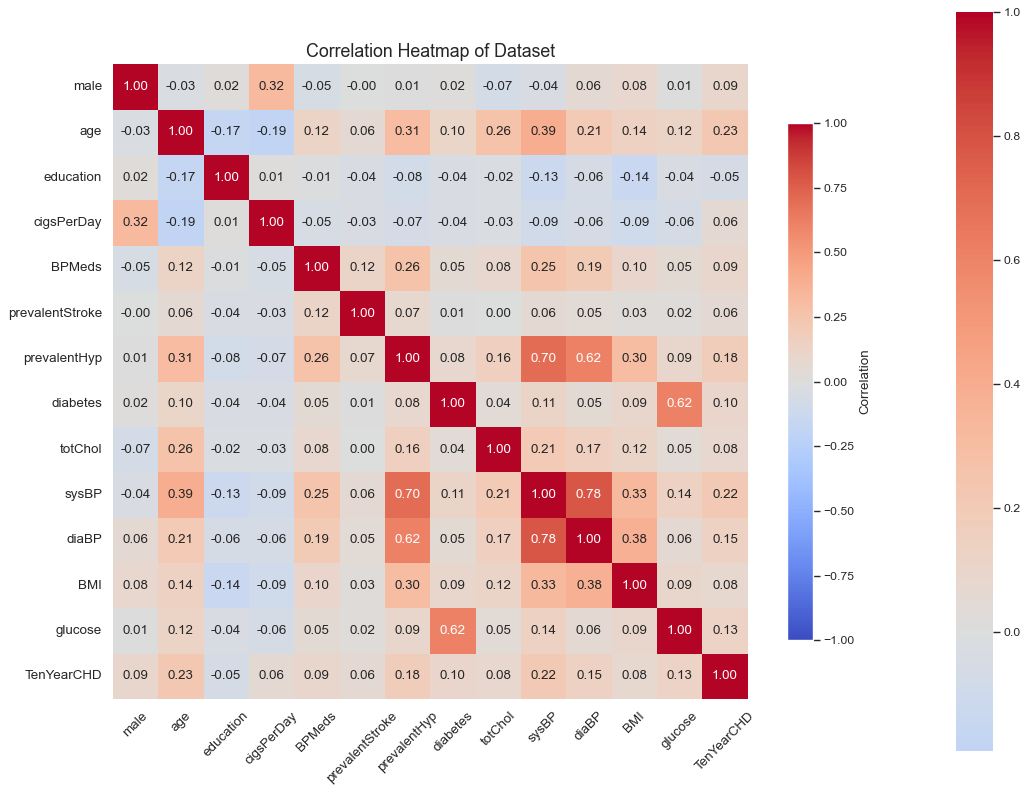

In [23]:
plt.figure(figsize=(16, 12), dpi=80)
heatmap = sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title('Correlation Heatmap of Dataset', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
dummy = plt.imshow([[0, 0], [0, 0]], cmap='coolwarm', vmin=-1, vmax=1)
heatmap.figure.colorbar(dummy, ax=heatmap, orientation='vertical', shrink=0.7, label='Correlation')
plt.show()

### Observations

The above graph shows us the coefficient of correlation value between different factors and target variable where "-1"  means the factor is least correlating and "1" means the factor is most correlating.

To get high accuracy from the model we will take only those features which have maximum value of correlating coefficient this is called feature engineering.
Selected Features:-
# a. INPUT FEATURES
1. gender
2. age 
3. currentSmoker
4. cigsPerDay
5. BPMeds
6. prevalentStroke
7. prevalentHyp
8. diabetes
9. totChol
10. sysBP
11. diaBP
12. BMI
13. heartRate
14. glucose

# b. TARGET VARIABLE
TenYearCHD

### Displaying selected features

In [24]:
df = pd.DataFrame(df)
df.rename(columns={'male': 'Gender'}, inplace=True)
columns_to_drop = ['education']
df.drop(columns=columns_to_drop, inplace=True)
df

,Gender,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,glucose,TenYearCHD
0,1,39,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,77.0,0
1,0,46,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,76.0,0
2,1,48,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,70.0,0
3,0,61,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,103.0,1
4,0,46,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,86.0,1
4234,1,51,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,68.0,0
4235,0,48,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,86.0,0
4236,0,44,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,NaN,0


### Exploratory Data Analysis

In [25]:
def condition_ratio(data):
    results = data['TenYearCHD'].value_counts()
    values = [results[0], results[1]]
    labels = ['Low probability', 'High probability']
    colors = ['MediumSeaGreen', 'Coral']
    fig_pie = go.Pie(labels=labels, values=values,
                     marker={'colors': colors, 
                             'line': {'color': 'Black', 'width': 2}})
    py.iplot([fig_pie])
    return py
condition_ratio(df)

<module 'plotly.offline' from 'C:\\Users\\ishaa\\AppData\\Roaming\\Python\\Python310\\site-packages\\plotly\\offline\\__init__.py'>

### Observation

From this pie chart we leaerned that:
84.2% (3594) people have a low probability of having a heat disease and
15.2% (644) people have a high probability of having a heart disease

### Feature variable Gender vs target(TenYearCHD)

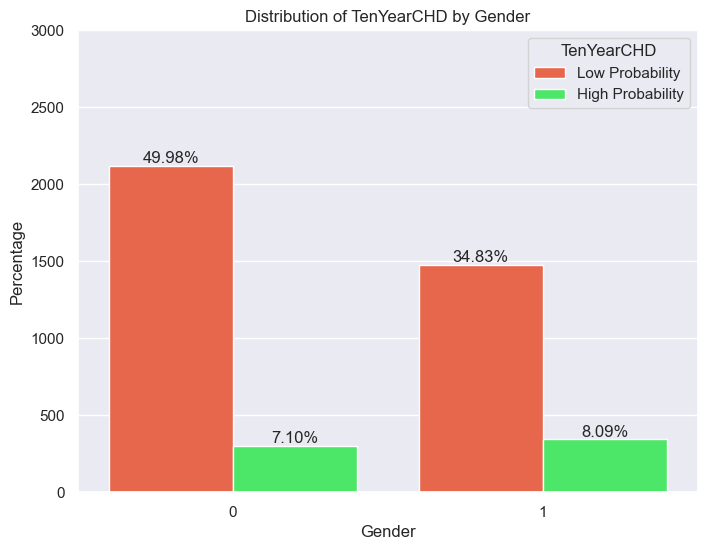

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
custom_colors = ['#FF5733', '#33FF57']
plt.figure(figsize=(8, 6))
sns.set_palette(custom_colors)
ax = sns.countplot(data=df, x='Gender', hue='TenYearCHD')
plt.title('Distribution of TenYearCHD by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.legend(title='TenYearCHD', labels=['Low Probability', 'High Probability'])
axes = plt.gca()
axes.set_ylim([0, 3000])
total = len(df)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height / total * 100:.2f}%', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=12)

plt.show()


### Observations

From the above analysis we got to know that according to our dataset men are having a higher chance of developing a heart disease.

### Feature variable Age vs target(TenYearCHD)

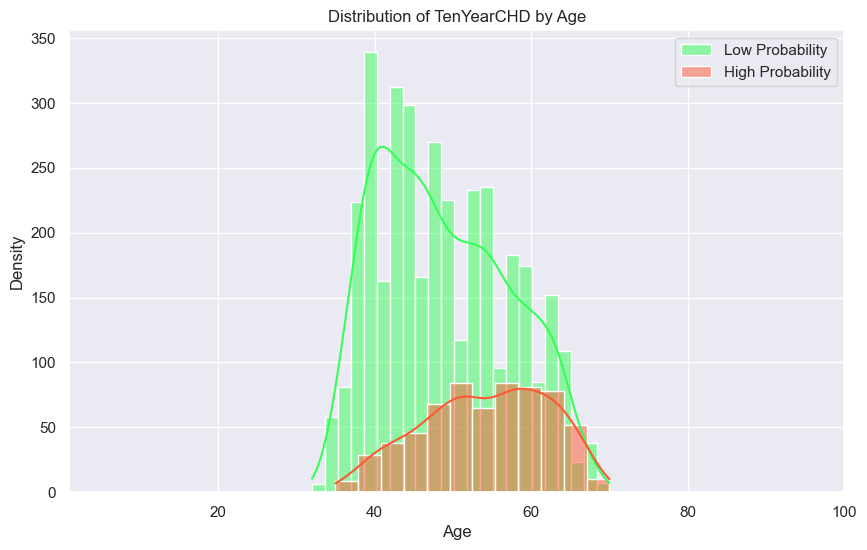

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
custom_colors = ['#33FF57', '#FF5733']
plt.figure(figsize=(10, 6))
sns.set_palette(custom_colors)
df_0 = df[df['TenYearCHD'] == 0]
df_1 = df[df['TenYearCHD'] == 1]
sns.histplot(data=df_0, x='age', kde=True, color='#33FF57', label='Low Probability')
sns.histplot(data=df_1, x='age', kde=True, color='#FF5733', label='High Probability')
plt.title('Distribution of TenYearCHD by Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.xlim(1, 100) 
plt.show()


### Observations

From the above analysis we got to know that according to our dataset people between age 45 to 65 have highest risk of developing a heart disease.

### Feature variable CigsPerDay vs target(TenYearCHD)

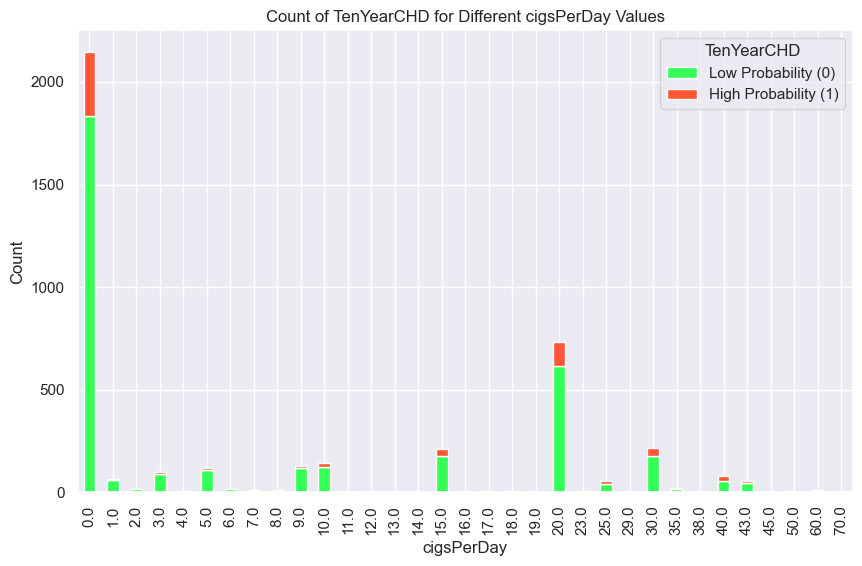

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
pivot_table = df.pivot_table(index='cigsPerDay', columns='TenYearCHD', values='age', aggfunc='count')
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('cigsPerDay')
plt.ylabel('Count')
plt.title('Count of TenYearCHD for Different cigsPerDay Values')
plt.legend(title='TenYearCHD', labels=['Low Probability (0)', 'High Probability (1)'])
plt.show()


### Observations

From the above analysis we got to know that according to our dataset:-
1. Most of the person are non smokers.
2. Most of the smokers smoke 20 cigs per day and are having highest probability from rest of the smokers.
3. The non smokers having higher probability can be due to other factors.

### Feature variable BPMeds vs target(TenYearCHD)

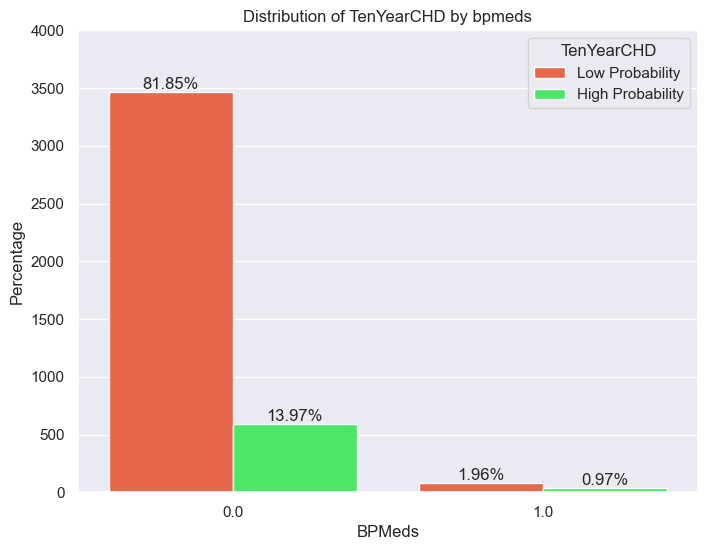

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
custom_colors = ['#FF5733', '#33FF57']
plt.figure(figsize=(8, 6))
sns.set_palette(custom_colors)
ax = sns.countplot(data=df, x='BPMeds', hue='TenYearCHD')
plt.title('Distribution of TenYearCHD by bpmeds')
plt.xlabel('BPMeds')
plt.ylabel('Percentage')
plt.legend(title='TenYearCHD', labels=['Low Probability', 'High Probability'])
axes = plt.gca()
axes.set_ylim([0, 4000])
total = len(df)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height / total * 100:.2f}%', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=12)

plt.show()


### Observations

From the above analysis we got to know that according to our dataset:-
Around 1% people who have a higher chance of getting heart disease are taking BP medications.

### Feature variable PrevalentStroke vs target(TenYearCHD)

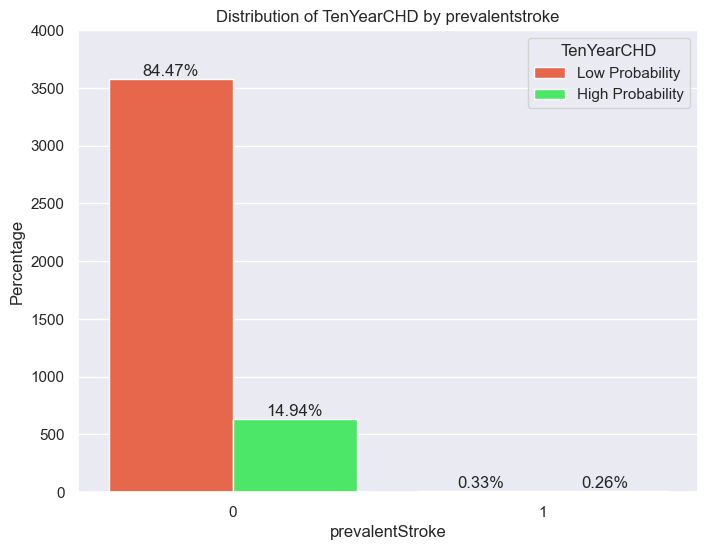

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
custom_colors = ['#FF5733', '#33FF57']
plt.figure(figsize=(8, 6))
sns.set_palette(custom_colors)
ax = sns.countplot(data=df, x='prevalentStroke', hue='TenYearCHD')
plt.title('Distribution of TenYearCHD by prevalentstroke')
plt.xlabel('prevalentStroke')
plt.ylabel('Percentage')
plt.legend(title='TenYearCHD', labels=['Low Probability', 'High Probability'])
axes = plt.gca()
axes.set_ylim([0, 4000])
total = len(df)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height / total * 100:.2f}%', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=12)

plt.show()


### Observations

From the above analysis we got to know that according to our dataset:-
Around 0.3% people who have a higher chance of getting heart disease have prevalent stroke.

### Feature variable Prevalent Hyp vs target(TenYearCHD)

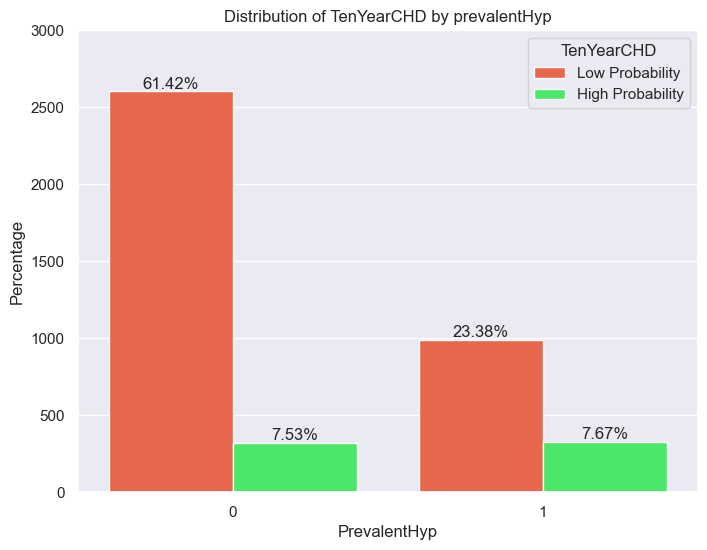

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
custom_colors = ['#FF5733', '#33FF57']
plt.figure(figsize=(8, 6))
sns.set_palette(custom_colors)
ax = sns.countplot(data=df, x='prevalentHyp', hue='TenYearCHD')
plt.title('Distribution of TenYearCHD by prevalentHyp')
plt.xlabel('PrevalentHyp')
plt.ylabel('Percentage')
plt.legend(title='TenYearCHD', labels=['Low Probability', 'High Probability'])
axes = plt.gca()
axes.set_ylim([0, 3000])
total = len(df)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height / total * 100:.2f}%', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=12)

plt.show()


### Observations

From the above analysis we got to know that according to our dataset:-
Around 7.7% people who have a higher chance of getting heart disease have prevalent hypertension.

### Feature variable Diabetes vs target(TenYearCHD)

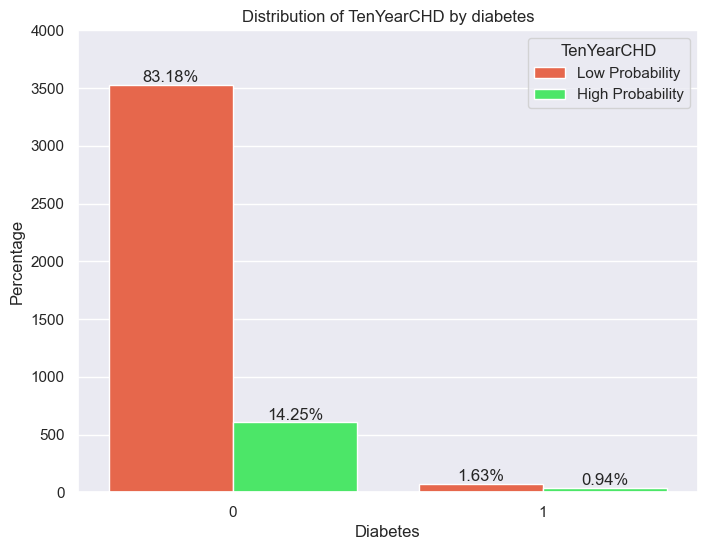

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
custom_colors = ['#FF5733', '#33FF57']
plt.figure(figsize=(8, 6))
sns.set_palette(custom_colors)
ax = sns.countplot(data=df, x='diabetes', hue='TenYearCHD')
plt.title('Distribution of TenYearCHD by diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Percentage')
plt.legend(title='TenYearCHD', labels=['Low Probability', 'High Probability'])
axes = plt.gca()
axes.set_ylim([0, 4000])
total = len(df)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height / total * 100:.2f}%', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=12)

plt.show()


### Observations

From the above analysis we got to know that according to our dataset:-
Around 1% people who have a higher chance of getting heart disease have diabetes.

### Feature variable Total Cholesterol vs target(TenYearCHD)

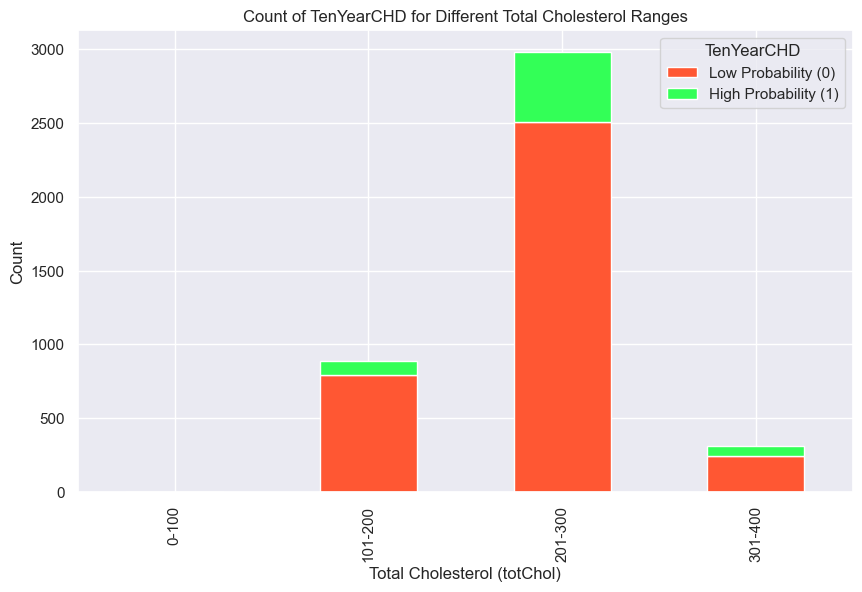

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
bins = [0, 100, 200, 300, 400]
labels = ['0-100', '101-200', '201-300', '301-400']
df['totChol_category'] = pd.cut(df['totChol'], bins=bins, labels=labels)
pivot_table = df.pivot_table(index='totChol_category', columns='TenYearCHD', values='age', aggfunc='count')
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Total Cholesterol (totChol)')
plt.ylabel('Count')
plt.title('Count of TenYearCHD for Different Total Cholesterol Ranges')
plt.legend(title='TenYearCHD', labels=['Low Probability (0)', 'High Probability (1)'])
plt.show()


### Observations

From the above analysis we got to know that according to our dataset:-
The highest probability of getting heart disease are those who have there cholesterol between 200 to 300.

### Feature variable sysBP vs target(TenYearCHD)

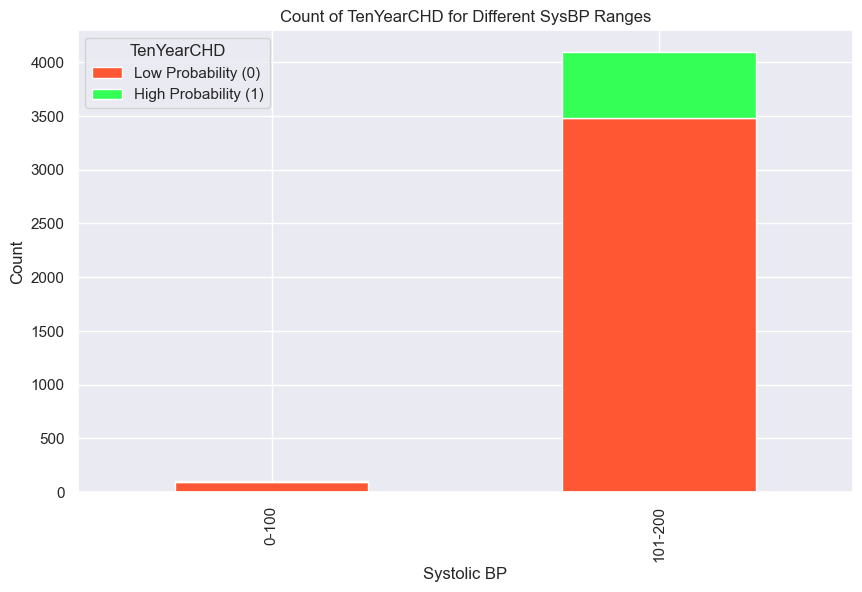

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
bins = [0, 100, 200]
labels = ['0-100', '101-200']
df['totChol_category'] = pd.cut(df['sysBP'], bins=bins, labels=labels)
pivot_table = df.pivot_table(index='totChol_category', columns='TenYearCHD', values='age', aggfunc='count')
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Systolic BP')
plt.ylabel('Count')
plt.title('Count of TenYearCHD for Different SysBP Ranges')
plt.legend(title='TenYearCHD', labels=['Low Probability (0)', 'High Probability (1)'])
plt.show()


### Observations

From the above analysis we got to know that according to our dataset:-
The highest probability of getting heart disease are those who have systolic blood pressure between 100 and 200.

### Feature variable diaBP vs target(TenYearCHD)

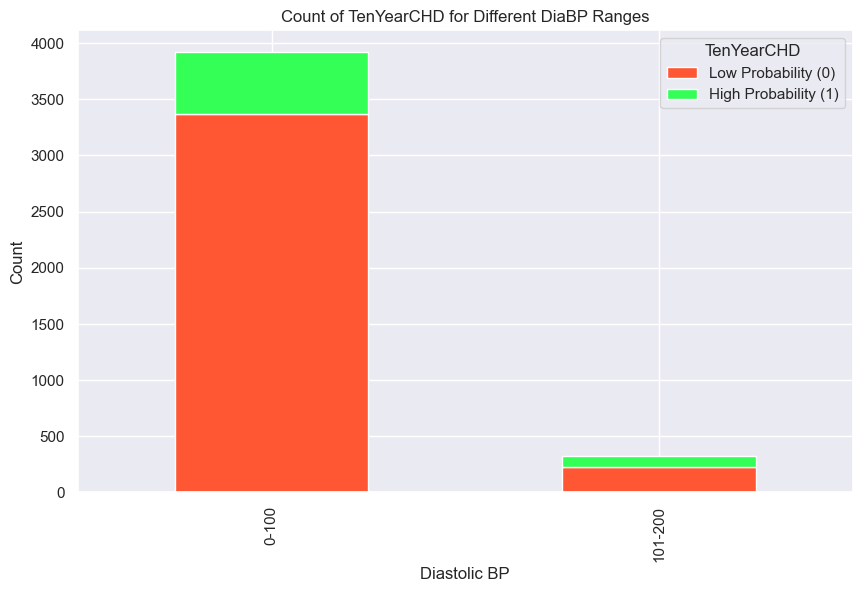

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
bins = [0, 100, 200]
labels = ['0-100', '101-200']
df['totChol_category'] = pd.cut(df['diaBP'], bins=bins, labels=labels)
pivot_table = df.pivot_table(index='totChol_category', columns='TenYearCHD', values='age', aggfunc='count')
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Diastolic BP')
plt.ylabel('Count')
plt.title('Count of TenYearCHD for Different DiaBP Ranges')
plt.legend(title='TenYearCHD', labels=['Low Probability (0)', 'High Probability (1)'])
plt.show()


### Observations

From the above analysis we got to know that according to our dataset:-
The highest probability of getting heart disease are those who have diastolic blood pressure between 0 and 100.

### Feature variable BMI vs target(TenYearCHD)

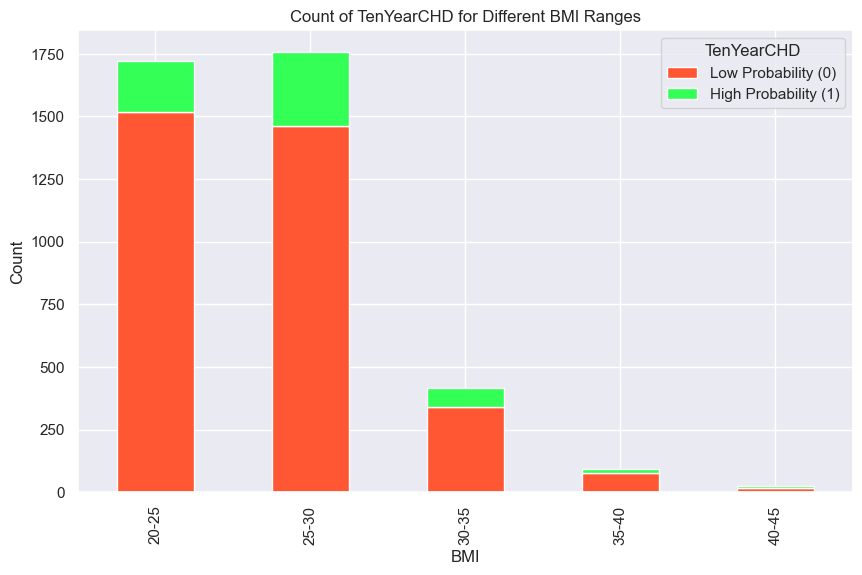

In [36]:
bmi_bins = [20, 25, 30, 35, 40, 50]
bmi_labels = ['20-25', '25-30', '30-35', '35-40', '40-45']
df['bmi_category'] = pd.cut(df['BMI'], bins=bmi_bins, labels=bmi_labels)
pivot_table_bmi = df.pivot_table(index='bmi_category', columns='TenYearCHD', values='age', aggfunc='count')
pivot_table_bmi.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('Count of TenYearCHD for Different BMI Ranges')
plt.legend(title='TenYearCHD', labels=['Low Probability (0)', 'High Probability (1)'])
plt.show()

### Observations

From the above analysis we got to know that according to our dataset:-
The highest probability of getting heart disease are those who have BMI between 25-30.

### Feature variable glucose vs target(TenYearCHD)

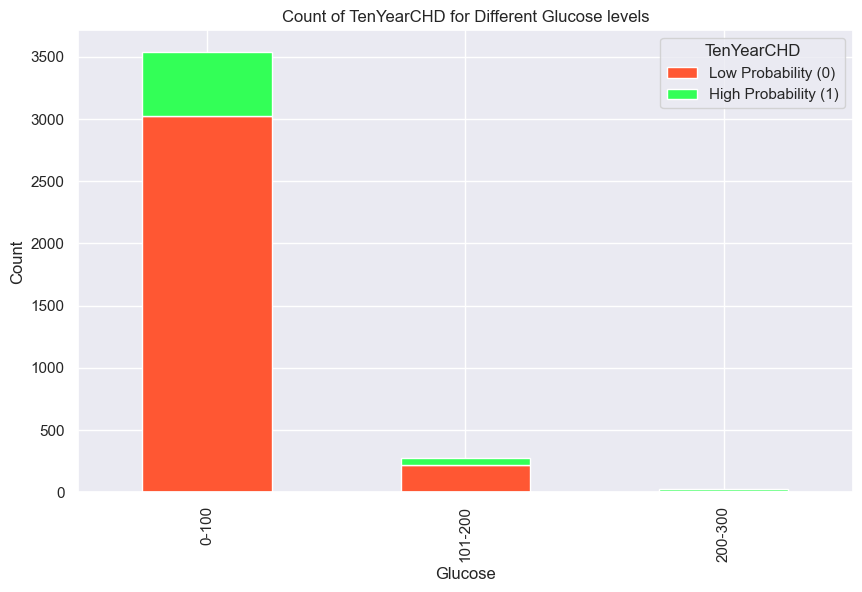

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
bins = [0, 100, 200,300]
labels = ['0-100', '101-200','200-300']
df['totChol_category'] = pd.cut(df['glucose'], bins=bins, labels=labels)
pivot_table = df.pivot_table(index='totChol_category', columns='TenYearCHD', values='age', aggfunc='count')
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Glucose')
plt.ylabel('Count')
plt.title('Count of TenYearCHD for Different Glucose levels')
plt.legend(title='TenYearCHD', labels=['Low Probability (0)', 'High Probability (1)'])
plt.show()


### Observations

From the above analysis we got to know that according to our dataset:-
The highest probability of getting heart disease are those who have glucose levels between 0-100 and 200-300.

The above Data is not fit for prediction of heart disease thats why we oversample the minority class using smote algorithm.